Karinne from DS1010 Group 4's Python code for the final 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel (r'C:\Users\koeys\Downloads\DS1010 Final Group 4\DS1010 Final Group 4 Python Files\DS1010_Filtered_Dataset.xlsx')
franchise_data = pd.read_excel(r'C:\Users\koeys\Downloads\DS1010 Final Group 4\DS1010 Final Group 4 Python Files\Top 100 Net Movies.xlsx')
data

,name,rating,genre,year,director,writer,star,budget,gross,company,runtime,budget _inflated,gross_inflated,net_inflated,franchise
0,Avatar,PG-13,Action,2009,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162,282030000.0,3.388223e+09,3.106193e+09,No
1,Avengers: Endgame,PG-13,Action,2019,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181,356000000.0,2.797501e+09,2.441501e+09,Yes
2,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138,264600000.0,2.235083e+09,1.970483e+09,Yes
3,Avengers: Infinity War,PG-13,Action,2018,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149,327420000.0,2.089327e+09,1.761907e+09,Yes
4,Jurassic World,PG-13,Action,2015,Colin Trevorrow,Rick Jaffa,Chris Pratt,150000000,1670516444,Universal Pictures,124,162000000.0,1.804158e+09,1.642158e+09,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,Jin ling shi san chai,R,Drama,2011,Yimou Zhang,Heng Liu,Christian Bale,94000000,2855644,Beijing New Picture Film,146,107160000.0,3.255434e+06,-1.039046e+08,No
3117,The Alamo,PG-13,Drama,2004,John Lee Hancock,Leslie Bohem,Dennis Quaid,107000000,25819961,Touchstone Pictures,137,144450000.0,3.485695e+07,-1.095931e+08,No
3118,Supernova,PG-13,Horror,2000,Walter Hill,William Malone,James Spader,90000000,14828081,Hammerhead Productions,90,133200000.0,2.194556e+07,-1.112544e+08,No
3119,The Adventures of Pluto Nash,PG-13,Action,2002,Ron Underwood,Neil Cuthbert,Eddie Murphy,100000000,7103973,Castle Rock Entertainment,95,142000000.0,1.008764e+07,-1.319124e+08,No


In [3]:
data.describe()

,year,budget,gross,runtime,budget _inflated,gross_inflated,net_inflated
count,3121.000000,3.121000e+03,3.121000e+03,3121.000000,3.121000e+03,3.121000e+03,3.121000e+03
mean,2009.187120,4.639433e+07,1.402522e+08,108.710670,5.550553e+07,1.646373e+08,1.091318e+08
std,5.632971,4.866712e+07,2.223841e+08,17.464706,5.634255e+07,2.512959e+08,2.131925e+08
min,2000.000000,7.000000e+03,5.073000e+03,63.000000,9.450000e+03,6.036870e+03,-1.580311e+08
25%,2004.000000,1.400000e+07,2.110775e+07,96.000000,1.665000e+07,2.620168e+07,3.666876e+05
50%,2009.000000,3.000000e+07,6.283221e+07,106.000000,3.570000e+07,7.713007e+07,3.690706e+07
75%,2014.000000,6.000000e+07,1.600992e+08,119.000000,7.524000e+07,1.904406e+08,1.256812e+08
max,2019.000000,3.560000e+08,2.847246e+09,219.000000,3.690000e+08,3.388223e+09,3.106193e+09


In [4]:
budget_gross_df = data[['budget _inflated','gross_inflated']].copy()
budget_gross_df

,budget _inflated,gross_inflated
0,282030000.0,3.388223e+09
1,356000000.0,2.797501e+09
2,264600000.0,2.235083e+09
3,327420000.0,2.089327e+09
4,162000000.0,1.804158e+09
...,...,...
3116,107160000.0,3.255434e+06
3117,144450000.0,3.485695e+07
3118,133200000.0,2.194556e+07
3119,142000000.0,1.008764e+07


In [5]:
data_norm = (budget_gross_df-budget_gross_df.min())/(budget_gross_df.max()-budget_gross_df.min())
data_norm

,budget _inflated,gross_inflated
0,0.764303,1.000000
1,0.964769,0.825654
2,0.717066,0.659662
3,0.887314,0.616643
4,0.439010,0.532478
...,...,...
3116,0.290388,0.000959
3117,0.391448,0.010286
3118,0.360959,0.006475
3119,0.384808,0.002975


## Making CSVs

In [6]:
avg_net_profit_by_director = data.groupby('director')['net_inflated'].mean()
sorted_director_net = avg_net_profit_by_director.sort_values(ascending=False)
sorted_director_net.to_csv('sorted_average_net_profit_by_director.csv', header=True)
print(sorted_director_net)

director
James Cameron         3.106193e+09
Chris Buck            1.272343e+09
Anthony Russo         1.171055e+09
Kyle Balda            1.082636e+09
Joss Whedon           8.962042e+08
                          ...     
Jim Gillespie        -6.868202e+07
Antony Hoffman       -6.887333e+07
Wych Kaosayananda    -7.078004e+07
Hironobu Sakaguchi   -7.469016e+07
Ron Underwood        -1.319124e+08
Name: net_inflated, Length: 1391, dtype: float64


In [7]:
avg_net_profit_by_writer = data.groupby('writer')['net_inflated'].mean()
sorted_writer_net = avg_net_profit_by_writer.sort_values(ascending=False)
sorted_writer_net.to_csv('sorted_average_net_profit_by_writer.csv', header=True)
print(sorted_writer_net)

writer
Lawrence Kasdan    1.970483e+09
James Cameron      1.670587e+09
J.R.R. Tolkien     1.277680e+09
Steve Kloves       1.060132e+09
Rick Jaffa         1.042695e+09
                       ...     
Kaja Blackley     -9.702379e+07
Heng Liu          -1.039046e+08
Leslie Bohem      -1.095931e+08
William Malone    -1.112544e+08
Neil Cuthbert     -1.319124e+08
Name: net_inflated, Length: 1941, dtype: float64


In [8]:
avg_net_profit_by_star = data.groupby('star')['net_inflated'].mean()
sorted_star_net = avg_net_profit_by_star.sort_values(ascending=False)
sorted_star_net.to_csv('sorted_average_net_profit_by_star.csv', header=True)
print(sorted_star_net)

star
Donald Glover      1.410728e+09
Daisy Ridley       9.545124e+08
Craig T. Nelson    8.970009e+08
Ellen DeGeneres    8.865709e+08
Rami Malek         8.771007e+08
                       ...     
Bruce Greenwood   -5.307674e+07
Lucas Till        -6.474151e+07
Garry Shandling   -6.786440e+07
Josh Lucas        -7.300850e+07
Benjamin Bratt    -9.068164e+07
Name: net_inflated, Length: 1136, dtype: float64


In [9]:
avg_net_profit_by_company = data.groupby('company')['net_inflated'].mean()
sorted_company_net = avg_net_profit_by_company.sort_values(ascending=False)
sorted_company_net.to_csv('sorted_average_net_profit_by_company.csv', header=True)
print(sorted_company_net)

company
Marvel Studios                1.085526e+09
Illumination Entertainment    1.082636e+09
Lucasfilm                     9.522755e+08
Fairview Entertainment        8.469638e+08
Avi Arad Productions          7.712069e+08
                                  ...     
Capella International        -6.048047e+07
Chris Lee Productions        -7.469016e+07
Beijing New Picture Film     -1.039046e+08
Hammerhead Productions       -1.112544e+08
Tribeca Productions          -1.580311e+08
Name: net_inflated, Length: 850, dtype: float64


In [10]:
avg_net_profit_by_year_genre = data.groupby(['year', 'genre'])['net_inflated'].mean()
avg_net_profit_by_year_genre.to_csv('average_net_profit_by_year_genre.csv', header=True)
print(avg_net_profit_by_year_genre)

year  genre    
2000  Action       1.120637e+08
      Adventure    9.656362e+07
      Animation    8.637203e+07
      Biography    1.097776e+08
      Comedy       5.045210e+07
                       ...     
2019  Crime        1.019427e+09
      Drama        1.025787e+08
      Fantasy      1.515026e+07
      Horror       1.397590e+08
      Thriller     2.859936e+07
Name: net_inflated, Length: 186, dtype: float64


In [11]:
avg_net_profit_by_year_rating = data.groupby(['year', 'rating'])['net_inflated'].mean()
avg_net_profit_by_year_rating.to_csv('average_net_profit_by_year_rating.csv', header=True)
print(avg_net_profit_by_year_rating)

year  rating
2000  G         1.204491e+08
      PG        5.122657e+07
      PG-13     9.265912e+07
      R         4.059518e+07
2001  G         2.514587e+08
                    ...     
2019  G         8.733946e+08
      PG        2.479849e+08
      PG-13     2.302174e+08
      R         9.307966e+07
      TV-MA     6.519925e+08
Name: net_inflated, Length: 83, dtype: float64


In [12]:
avg_net_profit_by_year_franchise = franchise_data.groupby(['year', 'Franchises'])['net_inflated'].mean()
avg_net_profit_by_year_franchise.to_csv('average_net_profit_by_year_franchise.csv', header=True)
print(avg_net_profit_by_year_franchise)

year  Franchises
2001  Yes           1.214394e+09
2002  Yes           1.014555e+09
2003  No            9.995494e+08
      Yes           1.088575e+09
2004  No            7.571216e+08
      Yes           9.157945e+08
2005  Yes           9.026258e+08
2006  No            8.064588e+08
      Yes           9.069542e+08
2007  Yes           8.125944e+08
2008  No            7.207282e+08
      Yes           9.769586e+08
2009  No            1.904871e+09
      Yes           8.265949e+08
2010  No            9.240176e+08
      Yes           7.125839e+08
2011  Yes           1.010050e+09
2012  No            1.008512e+09
      Yes           9.389395e+08
2013  No            9.650854e+08
      Yes           8.816010e+08
2014  Yes           8.673679e+08
2015  No            8.657907e+08
      Yes           1.572261e+09
2016  No            8.601821e+08
      Yes           9.412764e+08
2017  No            8.281217e+08
      Yes           9.018162e+08
2018  No            9.304409e+08
      Yes           1.4625

## Modes

In [13]:
rating_mode = data['rating'].mode()
print(rating_mode)

0    R
Name: rating, dtype: object


In [14]:
genre_mode = data['genre'].mode()
print(genre_mode)

0    Action
Name: genre, dtype: object


In [15]:
year_mode = data['year'].mode()
print(year_mode)

0    2002
Name: year, dtype: int64


In [16]:
director_mode = data['director'].mode()
print(director_mode)

0    Clint Eastwood
Name: director, dtype: object


In [17]:
writer_mode = data['writer'].mode()
print(writer_mode)

0    Woody Allen
Name: writer, dtype: object


In [18]:
star_mode = data['star'].mode()
print(star_mode)

0    Nicolas Cage
Name: star, dtype: object


In [19]:
company_mode = data['company'].mode()
print(company_mode)

0    Universal Pictures
Name: company, dtype: object


In [20]:
runtime_mode = data['runtime'].mode()
print(runtime_mode)

0    101
Name: runtime, dtype: int64


In [21]:
franchise_mode = data['franchise'].mode()
print(franchise_mode)

0    No
Name: franchise, dtype: object


## Linear Regression

In [22]:
X = data_norm.loc[:,['budget _inflated']]
y = data_norm.loc[:,['gross_inflated']]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [25]:
# Print slope and intercepts

# Beta_0
print(lin_reg_model.intercept_)
# Beta_1
print(lin_reg_model.coef_)

[-0.00480289]
[[0.35187289]]


In [26]:
# display the mean_squared_error of the model using training and testing data

from sklearn.metrics import mean_squared_error
print('training error')
print(mean_squared_error(y_train,lin_reg_model.predict(X_train)))
print('testing error')
print(mean_squared_error(y_test,lin_reg_model.predict(X_test)))

training error
0.0022493540228341155
testing error
0.003562573340614798


In [27]:
# use the trained linear regression model in the real-world
budget = 20000000
norm_budget = (budget - budget_gross_df['budget _inflated'].min())/(budget_gross_df['budget _inflated'].max() - budget_gross_df['budget _inflated'].min())
new_movie = pd.DataFrame({'budget _inflated': [norm_budget]})
norm_predicted_gross = lin_reg_model.predict(new_movie)
norm_predicted_gross_value = norm_predicted_gross[0][0]
predicted_gross = norm_predicted_gross_value * (budget_gross_df['gross_inflated'].max() - budget_gross_df['gross_inflated'].min()) + budget_gross_df['gross_inflated'].min()
print(predicted_gross)

48322970.48553446


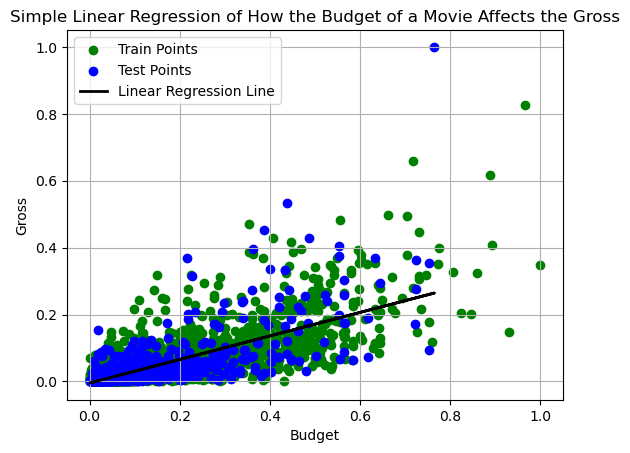

In [28]:
# y_pred stores the predicted values using X_test as input
y_pred = lin_reg_model.predict(X_test)

# Plot X_train and y_train using a scatter plot; color them green
# hint: plt.scatter(...)
plt.scatter(X_train, y_train, color='green', label='Train Points')

# Plot X_test and y_test using a scatter plot; color them red
plt.scatter(X_test, y_test, color='blue', label='Test Points')

# Plot the regression line
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Simple Linear Regression of How the Budget of a Movie Affects the Gross')

# Add a legend
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [29]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')

C:\Users\koeys\AppData\Local\Temp\ipykernel_16324\444293912.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Correlation

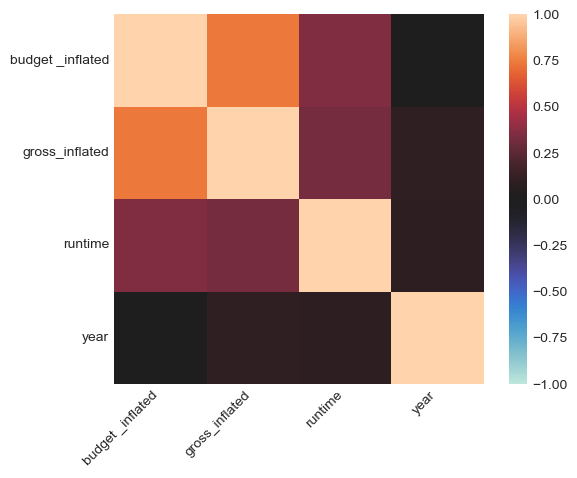

In [30]:
data_features = data[['budget _inflated','gross_inflated','runtime','year']].copy()
data_corr = data_features.corr()
ax = sns.heatmap(
    data_corr, 
    vmin=-1, vmax=1, center=0,
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);